# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [66]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [67]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        print(city_url + city)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | enewetak
http://api.openweathermap.org/data/2.5/weather?appid=e588ec51b891d2b887520da376e73f48&units=metric&q=enewetak
Processing Record 2 of Set 1 | kapuskasing
http://api.openweathermap.org/data/2.5/weather?appid=e588ec51b891d2b887520da376e73f48&units=metric&q=kapuskasing
Processing Record 3 of Set 1 | wailua homesteads
http://api.openweathermap.org/data/2.5/weather?appid=e588ec51b891d2b887520da376e73f48&units=metric&q=wailua homesteads
Processing Record 4 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=e588ec51b891d2b887520da376e73f48&units=metric&q=bethel
Processing Record 5 of Set 1 | adamstown
http://api.openweathermap.org/data/2.5/weather?appid=e588ec51b891d2b887520da376e73f48&units=metric&q=adamstown
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
http://api.openweathermap.org/data/2.5/weather?appid=e588ec51b891d2b887520da376e73f48&units=metric&q=petropavlovsk-ka

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [89]:
print(f'{len(city_data_df["City"])} of {len(cities)} cities were found in the OpenWeatherMap API database.')

572 of 599 cities were found in the OpenWeatherMap API database.


In [69]:
#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,27.06,80,47,10.49,MH,1682934213
1,kapuskasing,49.4169,-82.4331,6.05,100,100,5.66,CA,1682934061
2,wailua homesteads,22.0669,-159.3780,23.44,85,40,5.66,US,1682934214
3,bethel,41.3712,-73.4140,11.20,87,40,2.57,US,1682934215
4,adamstown,-25.0660,-130.1015,25.08,83,77,5.33,PN,1682934215


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.06,80,47,10.49,MH,1682934213
1,kapuskasing,49.4169,-82.4331,6.05,100,100,5.66,CA,1682934061
2,wailua homesteads,22.0669,-159.3780,23.44,85,40,5.66,US,1682934214
3,bethel,41.3712,-73.4140,11.20,87,40,2.57,US,1682934215
4,adamstown,-25.0660,-130.1015,25.08,83,77,5.33,PN,1682934215


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

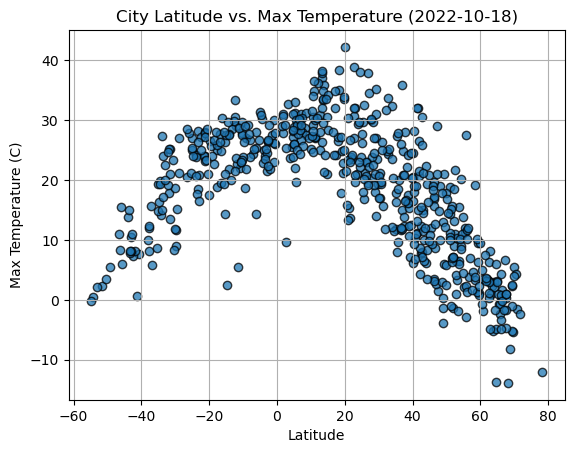

In [72]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Max Temperature (2022-10-18).png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

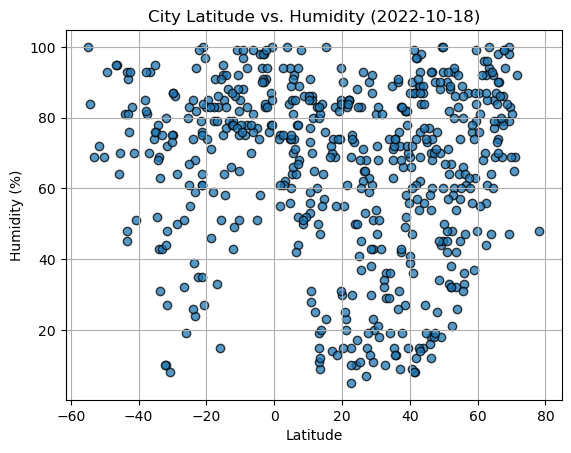

In [73]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Humidity (2022-10-18).png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

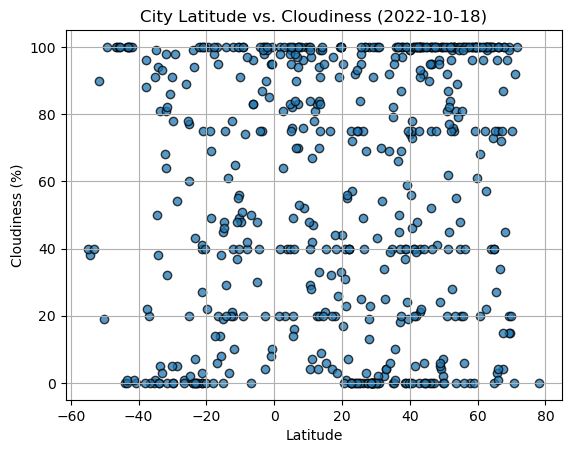

In [74]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Cloudiness (2022-10-18).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

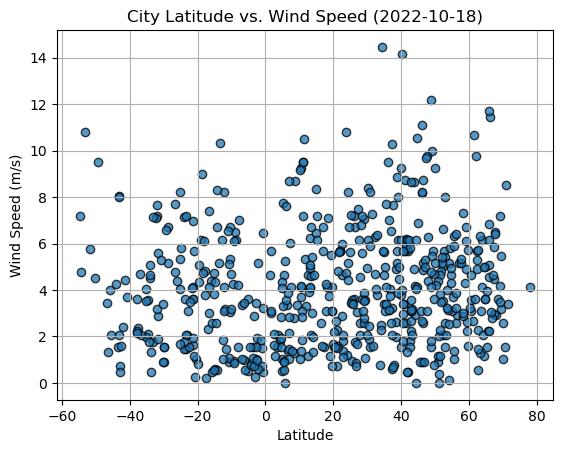

In [75]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(latitude, wind_speed, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Wind Speed (2022-10-18).png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [76]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    print(f"The r-value is: {rvalue}")

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    y_data = min(y_values) + 2
    x_data = min(x_values) + 15

    plt.text(x_data, y_data, f'{line_eq}', color="red")

    plt.show()

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.06,80,47,10.49,MH,1682934213
1,kapuskasing,49.4169,-82.4331,6.05,100,100,5.66,CA,1682934061
2,wailua homesteads,22.0669,-159.3780,23.44,85,40,5.66,US,1682934214
3,bethel,41.3712,-73.4140,11.20,87,40,2.57,US,1682934215
5,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,60,75,8.00,RU,1682934216


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,25.08,83,77,5.33,PN,1682934215
6,edinburgh of the seven seas,-37.0676,-12.3116,15.69,70,20,4.70,SH,1682934216
8,bredasdorp,-34.5322,20.0403,19.82,52,50,2.09,ZA,1682933770
10,fortaleza,-3.7227,-38.5247,25.07,94,75,1.54,BR,1682934219
16,senanga,-16.1167,23.2667,30.34,15,14,4.39,ZM,1682934222


The r-value is: -0.8319860005014692


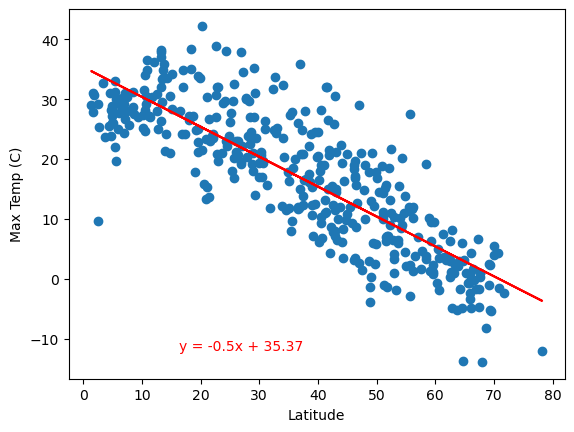

In [79]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp (C)")

The r-value is: 0.7276421571837935


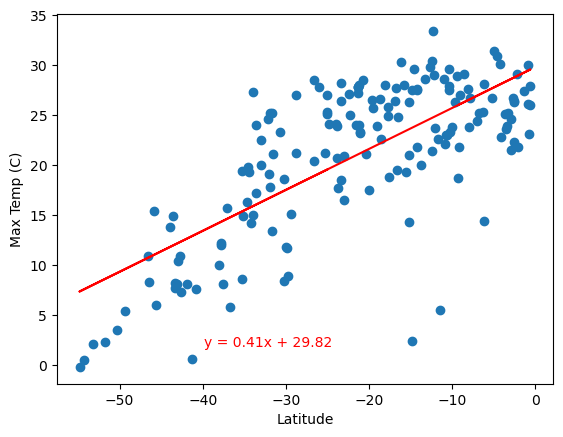

In [80]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp (C)")

**Discussion about the linear relationship:** We can see from these graphs and their relevant R values, that there is quite a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, there is a strong negative correlation between latitude and maximum temperature; as latitude increases away from the equator, max temperature decreases as seen by the negative slope. In the Southern Hemisphere we see the opposite. In the Southern Hemisphere, there is a strong positive correlation between latitude and maximum temperature; as latitude decreases towards the equator, max temperature increases as seen by the positive slope. The slope is very similar between Northern and Southern Hemisphere linear regression lines, further supporting that the same effect is exhibiting this relationship between max temperature and latitude. In conclusion, maximum temperature increases as proximity to the equator increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13416027628228


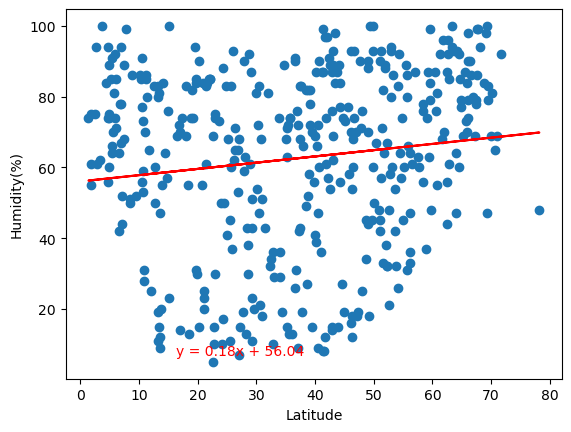

In [81]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity(%)")

The r-value is: 0.19485622858378432


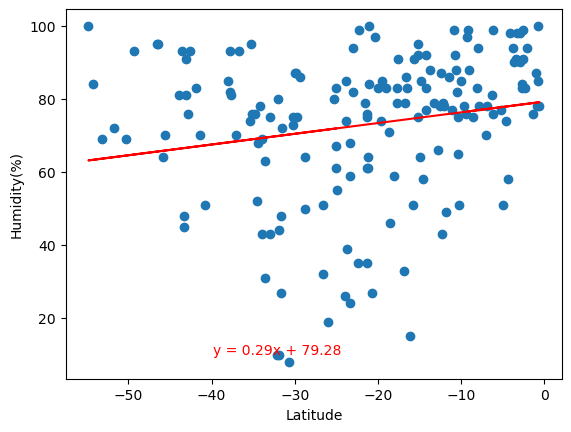

In [82]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity(%)")

**Discussion about the linear relationship:** We can see from these graphs and their relevant R values, that there is quite a weak, almost non-existant relationship between humidity and latitude. In the Northern Hemisphere, there is a very weak positive correlation between latitude and humidity. In the Southern Hemisphere, we see the same; there is a very weak positive correlation between latitude and humidity. The slope is very similar between Northern and Southern Hemisphere linear regression lines, but both are marginal. In conclusion, latitude has no signicant effect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08374118695278654


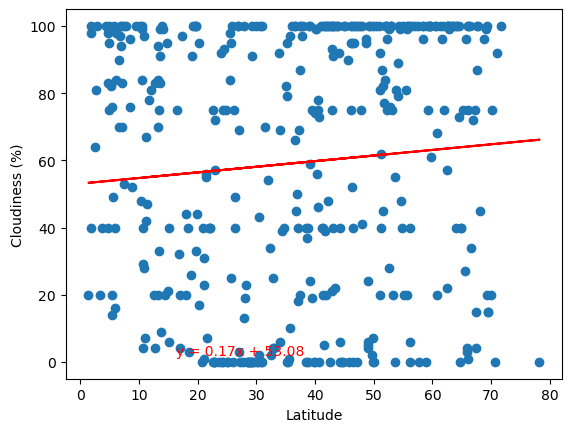

In [83]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)")

The r-value is: 0.08932576515843486


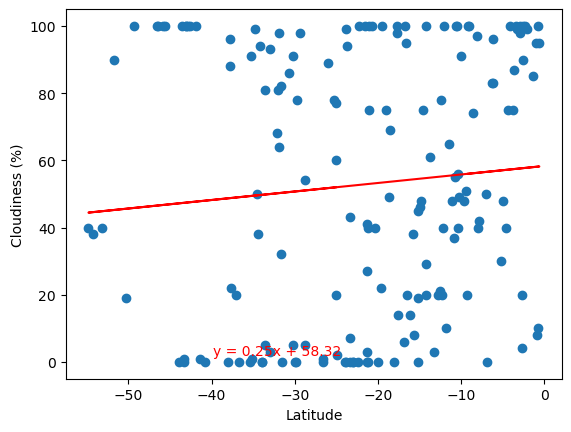

In [84]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)")

**Discussion about the linear relationship:** We can see from these graphs and their relevant R values, that there is also quite a weak, almost non-existant relationship between cloudiness and latitude. In the Northern Hemisphere, there is a very weak positive correlation between latitude and cloudiness. In the Southern Hemisphere, we see the same; there is a very weak positive correlation between latitude and cloudiness. The slope is very similar between Northern and Southern Hemisphere linear regression lines, but both are marginal. In conclusion, latitude has no signicant effect on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

In [85]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    print(f"The r-value is: {rvalue}")

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    y_data = max(y_values) - 1
    x_data = min(x_values) + 10

    plt.text(x_data, y_data, f'{line_eq}', color="red")

    plt.show()

The r-value is: 0.08707928644957451


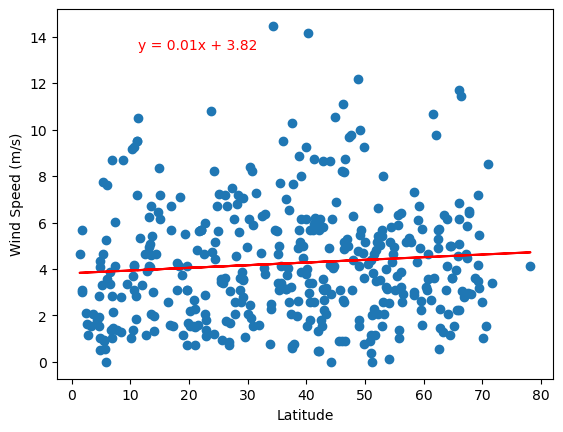

In [86]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (m/s)")

The r-value is: -0.2163917369287823


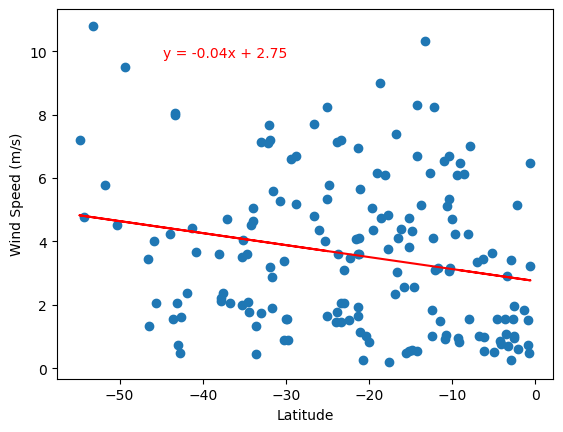

In [87]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (m/s)")

**Discussion about the linear relationship:** We can see from these graphs and their relevant R values, that there is some relationship between latitude and wind speed. In the Northern Hemisphere, there is a weak, positive correlation between latitude and wind speed; as latitude increases away from the equator, wind speed increases with a somewhat positive slope. In the Southern Hemisphere we see the opposite. In the Southern Hemisphere, there is a weak, negative correlation between latitude and wind speed; as latitude decreases towards the equator, wind speed decreases with a slight negative slope. The slope is very similar in steepness between Northern and Southern Hemisphere linear regression lines, both moving towards 0 and further supporting that the same effect is exhibiting this relationship between wind speed and latitude. In conclusion, wind speed tends to decrease as proximity to the equator increases.